# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* *Gankin, Dennis*
* *Zhang, Yuan*
* *Ji, Yipeng*

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---
### Importing the networks

In [1]:
import networkx as nx
G_absorbing=nx.read_adjlist("data/absorbing.graph",create_using=nx.DiGraph())
G_components=nx.read_adjlist("data/components.graph",create_using=nx.DiGraph())
import matplotlib.pyplot as plt

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [2]:
from random import randint,choice

def random_surfer(G,iterations):
    amount_nodes=len(G.nodes())
    ranks= {int(key): 0 for key in G.nodes()}
    #get all out edges
    out_edges=G.out_edges()
    
    current_node=randint(0,amount_nodes-1)
    
    for i in range(iterations):
        ranks[current_node]+=1
        #pick next edge to walk randomly from outgoing edges
        #find all possible neighbours 
        neighbors=list(nx.neighbors(G,str(current_node)))
        #for (u,v) in out_edges:
        #    if u==current_node:
        #        neighbors.append(v)
        
        if neighbors!=[]:
            current_node=int(choice(neighbors))
        else:
            print("stuck in iteration..",i,"  node: ", current_node)
            
            if i!=0:
                for n in range(len(ranks)):
                    ranks[n]=ranks[n]/i
                return ranks
            else:
                return None
            
            break
        
    #nromalize ranks
    if iter!=0:
        for i in range(len(ranks)):
            ranks[i]=ranks[i]/iterations
            
    return ranks


#### Random surfer on absorbing Graph

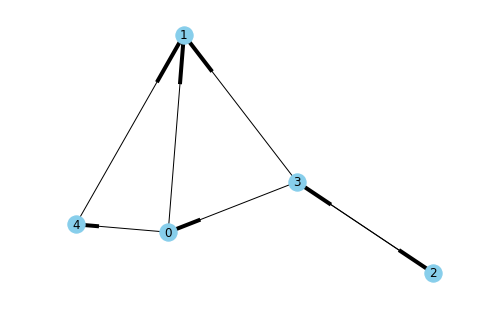

In [4]:
nx.draw(G_absorbing,with_labels=True,node_color="skyblue")
plt.show()

In [5]:
for i in range(10):
    print (random_surfer(G_absorbing,1000))

stuck in iteration.. 0   node:  1
None
stuck in iteration.. 2   node:  1
{0: 0.5, 1: 0.5, 4: 0.0, 2: 0.0, 3: 0.5}
stuck in iteration.. 2   node:  1
{0: 0.5, 1: 0.5, 4: 0.5, 2: 0.0, 3: 0.0}
stuck in iteration.. 2   node:  1
{0: 0.5, 1: 0.5, 4: 0.5, 2: 0.0, 3: 0.0}
stuck in iteration.. 1   node:  1
{0: 0.0, 1: 1.0, 4: 1.0, 2: 0.0, 3: 0.0}
stuck in iteration.. 1   node:  1
{0: 0.0, 1: 1.0, 4: 0.0, 2: 0.0, 3: 1.0}
stuck in iteration.. 1   node:  1
{0: 1.0, 1: 1.0, 4: 0.0, 2: 0.0, 3: 0.0}
stuck in iteration.. 10   node:  1
{0: 0.1, 1: 0.1, 4: 0.1, 2: 0.4, 3: 0.4}
stuck in iteration.. 2   node:  1
{0: 0.5, 1: 0.5, 4: 0.0, 2: 0.0, 3: 0.5}
stuck in iteration.. 0   node:  1
None




On the absorbing graph we have a dangling node (node 1) which causes the random surfer to get stuck on that node without being able to continue surfing.  Before getting stuck the surfer can only visit very few nodes. Thus the results are not meaningful.



#### Random surfer on components graph

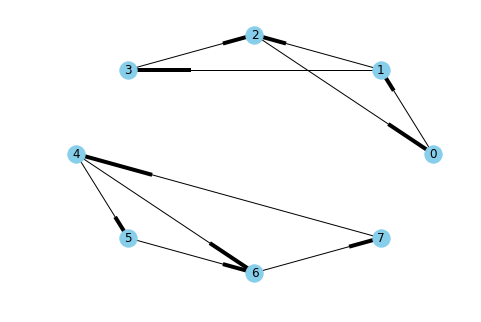

In [6]:
nx.draw(G_components,with_labels=True,pos= nx.circular_layout(G_components),node_color="skyblue")
plt.show()

In [7]:
for i in range(10):
    print(random_surfer(G_components,5000))

{0: 0.2842, 1: 0.2842, 2: 0.2844, 3: 0.1472, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.285, 1: 0.285, 2: 0.2848, 3: 0.1452, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.2844, 1: 0.2844, 2: 0.2844, 3: 0.1468, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2856, 5: 0.1432, 6: 0.2856, 7: 0.2856}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2854, 5: 0.1442, 6: 0.2852, 7: 0.2852}
{0: 0.2878, 1: 0.2878, 2: 0.288, 3: 0.1364, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.2864, 1: 0.2864, 2: 0.2864, 3: 0.1408, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.2842, 1: 0.2842, 2: 0.2844, 3: 0.1472, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.2866, 1: 0.2866, 2: 0.2864, 3: 0.1404, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{0: 0.2844, 1: 0.2844, 2: 0.2846, 3: 0.1466, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}




Random surfer on the components graph always returns 0 for the ranks of one of the two components.  
As the graph consist of two components, the random surfer starts in one of those components and never visits the other one during the surfing. Thus, the surfed component gets a ranking while all the nodes from the not surfed components are ranked 0. 


#### Exercise 2.13

In [8]:
from random import random

def random_surfer_better(G,iterations,damping_factor=0.15):
    #tolerance for convergence
    tolerance=1.0e-6

    amount_nodes=len(G.nodes())
    #create dictionary for ranks
    ranks= {int(key): 0 for key in G.nodes()}
    edges=list(G.edges())
    
    #first node randomly
    current_node=randint(0,amount_nodes-1)
    
    last_result=[0]*amount_nodes
    
    for i in range(iterations):
        ranks[current_node]+=1
        #get neighbors
        neighbors=list(nx.neighbors(G,str(current_node)))       
        
        #random restart if dangling edge or randomly (damping factor)

        if (random()>damping_factor) and (len(neighbors)>0):
                       current_node=int(choice(list(neighbors)))
        else:
                       current_node=randint(0,amount_nodes-1)
        
        new_result= {int(key): 0 for key in G.nodes()}
        for n in range(amount_nodes):
            new_result[n]=ranks[n]/(i+1)
        
        err = sum([abs(new_result[n] - last_result[n]) for n in range(amount_nodes)])
        last_result=new_result
        if err < amount_nodes * tolerance:
            
            return new_result
        
    print(" not converged")       
    if iter!=0:
        for i in range(amount_nodes):
            ranks[i]=ranks[i]/iterations
            
    return ranks


In [9]:
for i in range(3):
    print (random_surfer_better(G_absorbing,1000000))

{0: 0.14763737155933854, 1: 0.3379768967301207, 4: 0.14998244030648275, 2: 0.14912522516058624, 3: 0.21527806624347176}
{0: 0.1478827484606958, 1: 0.338182298946096, 4: 0.15067427189967136, 2: 0.1493974993389491, 3: 0.2138631813545877}
{0: 0.14852174966678783, 1: 0.3397628135223555, 4: 0.1506535502241609, 2: 0.14802571792075608, 3: 0.21303616866593966}


In [10]:
for i in range(3):
    print (random_surfer_better(G_components,1000000))

{0: 0.1406952086466692, 1: 0.1378179678085327, 2: 0.14363317047651966, 3: 0.07763412332900502, 4: 0.138415836034639, 5: 0.07729315160630378, 6: 0.14353975356619056, 7: 0.1409707885321401}
{0: 0.14188184462296707, 1: 0.13902475520682334, 2: 0.14462670794093166, 3: 0.07862841003675405, 4: 0.13750502679398094, 5: 0.07702451205027729, 6: 0.14164804025176056, 7: 0.13966070309650508}
{0: 0.1410555815039701, 1: 0.13878561419897245, 2: 0.14374591312470808, 3: 0.07746380196170013, 4: 0.13784680056048576, 5: 0.07776272769733769, 6: 0.14329285380663243, 7: 0.14004670714619336}


---

We can see better results and real convergence with the second implementation. So the problem with dangling nodes and different components in a graph is overcome by this strategy


#### Plotting the ranks


Plotting the graphs with the ranks, to see if the ranking is intuitive. The bigger the nodes the higher the ranking

In [11]:
#create labels for graph
lables_abs=random_surfer_better(G_absorbing,1000000)
lables_com=random_surfer_better(G_components,1000000)
#shorten labels
l_abs={}
l_com={}
for key in lables_abs.keys():
    l_abs[str(key)]="%.2f" % lables_abs[key]
for key in lables_com.keys():
    l_com[str(key)]="%.2f" % lables_com[key]

In [12]:
node_size_ab={}
node_size_com={}
for k,v in l_abs.items():
    node_size_ab[k]=(10000 * float(v))
for k,v in l_com.items():
    node_size_com[k]=(20000 * float(v))

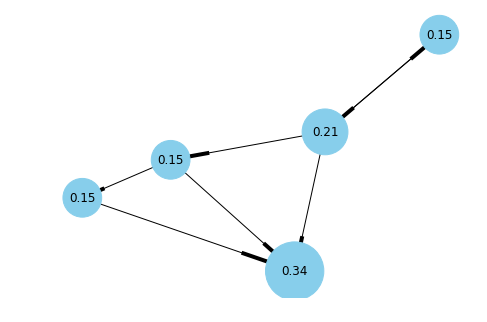

In [15]:
nx.draw(G_absorbing,with_labels=True,node_color="skyblue",labels=l_abs,node_size=list(node_size_ab.values()))
plt.show()

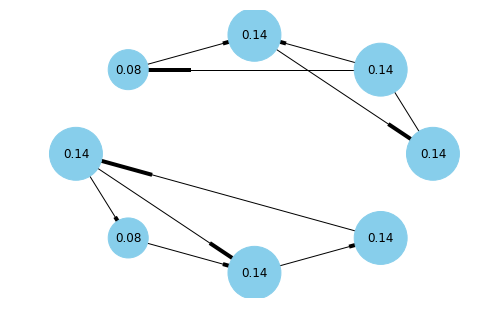

In [17]:
nx.draw(G_components,with_labels=True,node_color="skyblue",pos= nx.circular_layout(G_components),labels=l_com,node_size=list(node_size_com.values()))
plt.show()

We think the page ranking makes intuitive sense. The nodes with more incoming edges have a higher score because it is more probable that a surfer will be there at a random point in time than on a node with less incoming links.  
For the component graph we can see that corresponding nodes in both components have same ranks. The three 0.14 scored nodes build a cirlce in each component, so a surfer is as likley to find himself on any of the nodes, so it is logical that they have the same rank. The forth node is an addition to the circle. But as it can be reached only from one of the nodes in the circle it has lower probability of landing there and thus a lower score. 

In the absorbing graph the dangling node has the highest score which makes sense because it has the most incoming edges. So the probability to land there as a random surfer is very high. The 0.21 node has a score a little higher than the other nodes because there is one neighboring node that will always lead back to the 0.21 node. The other three nodes all have only one incoming edge so they have the same score and probability to be there for the surfer at a random point in time.  
So to conclude, the scores seem to be logically distributed.  All in all, page rank is quite intuitive.

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [41]:
def power_iteration(G,max_iter,damping=0.85):
    #code inspired by networkx documentation of pwer_iteration
    
    #tolerance or checking convergence
    tolerance=1.0e-6

    #form stochastic Graph to be able to get adjacency matrix
    A = nx.stochastic_graph(G)
    N = G.number_of_nodes()


    # fixed starting vector
    x = {key:1.0 / N for key in G.nodes()}

    # create dictionary for dangling nodes and indicator vector of dangling nodes (dangling_w)
    dangling_nodes = [n for n in G.nodes() if G.out_degree(n) == 0.0]
    

    # power iteration: run up to max_iter iterations
    for _ in range(max_iter):
        #x_before is x_(k-1)
        #x is x_k
        x_before = x
        x = {key:0 / N for key in x_before.keys()}

        #part of the transition matrix H for later
        dangling_sum =  sum(x_before[n] for n in dangling_nodes) 
        
        for n in x:
            # left multiply x^G = x_before^G*adj
            
            #all nodes i, where n has outgoing edges to (i is part of neighbors)
            for i in A[n]:
                x[i] += damping * x_before[n] * A[n][i]['weight']
            
            
            x[n] += damping * dangling_sum * 1.0/N  + (1.0 - damping) * 1/N
            
        # check for convergence with L1 norm
        err = sum([abs(x[n] - x_before[n]) for n in x])
        if err < N * tolerance:
            return x
    print ("not converged")
    return x

In [42]:
G_wiki=nx.read_adjlist("data/wikipedia.graph",create_using=nx.DiGraph())

In [43]:
wiki_ranks=power_iteration(G_wiki,500)
wiki_top=sorted(wiki_ranks,key=wiki_ranks.get,reverse=True)[0:10]
from pandas import read_csv
titles = read_csv("data/wikipedia_titles.tsv", sep="\t")

In [44]:
top_articles=[]
for elem in wiki_top:
    top_articles.append(titles.get_values()[int(elem)])

print ("Top ten wiki pages:")
for i in top_articles:
    print (i)

Top ten wiki pages:
[5210 'United States']
[5201 'United Kingdom']
[2034 'France']
[1890 'Europe']
[2168 'Germany']
[1811 'England']
[5477 'World War II']
[2999 'Latin']
[2619 'India']
[1818 'English language']


---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*

Most simple approach would be pick the top 300 pages and add edges from those to the History of mathematics page

The score below is the site's score without any augmentation

In [45]:
wiki_ranks['2463']

9.705905353496401e-05

In [46]:
titles_dict=titles.to_dict()

In [47]:
titles_dict.keys()

dict_keys(['#page_id', 'page_title'])

In [48]:
titles_dict=titles_dict['page_title']

In [49]:
for index, name in titles_dict.items():   
    if name == 'History of mathematics':
        print (index)

2463


In [50]:
w_ranks=sorted(wiki_ranks,key=wiki_ranks.get,reverse=True)

In [51]:
for indx,num in enumerate(w_ranks):    
    if num == '2463':
        print (indx)

2549


In [52]:
#adding 300 edges from most important sites
wiki_leaks=G_wiki.copy()
added=0
counter=0
while added<300:
    elem=w_ranks[counter]
    if added<300:
        if not ((elem,'2463') in wiki_leaks.in_edges('2463')):
            wiki_leaks.add_edge(elem,'2463')
            added=added+1
    if added%50==0:
        print(added)
    counter=counter+1

50
100
150
200
250
300


In [53]:
wiki_ranks=power_iteration(wiki_leaks,500)
w_ranks=sorted(wiki_ranks,key=wiki_ranks.get,reverse=True)
for indx,num in enumerate(w_ranks):    
    if num == '2463':
        print (indx)

3


In [54]:
top_articles=[]
for i in range(10):
    top_articles.append(titles.get_values()[int(w_ranks[i])])

print ("Top ten wiki pages:")
for i in top_articles:
    print (i)

Top ten wiki pages:
[5210 'United States']
[5201 'United Kingdom']
[2034 'France']
[2463 'History of mathematics']
[1890 'Europe']
[2168 'Germany']
[1811 'England']
[5477 'World War II']
[2999 'Latin']
[2619 'India']


I added 300 edges and went from rank 2550 to rank 4

In [55]:
wiki_ranks['2463']

0.004669798237159422

The score went from 9.705905353496401e-05 to 0.004669798237159422. That is approximately 48 times higher